# Context

In [1]:

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data = pd.read_csv('train.csv', index_col='PassengerId')

# Data quality assessment

In [3]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum().sort_values(ascending=False)

Cabin       67866
Ticket       4623
Age          3292
Embarked      250
Fare          134
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
dtype: int64

В столбце Cabin более 2/3 пропущенных значений

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [7]:
# Столбцы Name, Ticket и Cabin состоят в основном из различных значений.

data.nunique()

Survived        2
Pclass          3
Name        92144
Sex             2
Age           173
SibSp           7
Parch           8
Ticket      75331
Fare        15935
Cabin       26992
Embarked        3
dtype: int64

In [8]:
data.Name.value_counts()

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
                     ..
Davis, Andre          1
Rosenblum, Ronald     1
Landry, Ernesto       1
Mcdonald, Frances     1
Enciso, Tyler         1
Name: Name, Length: 92144, dtype: int64

In [9]:
data.Cabin.value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

In [10]:
data.Ticket.value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [11]:
data.Pclass.value_counts() / data.shape[0]

3    0.41006
1    0.30315
2    0.28679
Name: Pclass, dtype: float64

In [12]:
data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [13]:
data.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [14]:
data.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

In [15]:
data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

<mark>В столбцах SibSp, Parch отсутствуют некоторые промежуточные значения. Данные могут быть ошибочными или неполными. Возможно максимальное значение соответствует скрытым пропускам.</mark>

In [16]:
# Заменим строку о поле пассажира флажком

data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.00000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,0.43886,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,0.49625,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.00000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,0.00000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,0.00000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,1.00000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,1.00000,87.000000,8.000000,9.000000,744.66000


In [17]:
# Посмотрим статистику по данным с пропусками

data[data.Age.isna()].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,3292.000000,3292.000000,3292.000000,0.0,3292.000000,3292.000000,3287.000000
mean,0.411908,2.127582,0.420717,NaN,0.381531,0.433475,43.608126
std,0.492253,0.834244,0.493749,NaN,0.824422,0.900797,70.970441
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,2.790000
25%,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,10.000000
50%,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,23.890000
75%,1.000000,3.000000,1.000000,NaN,1.000000,1.000000,32.670000
max,1.000000,3.000000,1.000000,NaN,8.000000,9.000000,732.010000


In [18]:
data[data.Fare.isna()].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,134.000000,134.000000,134.000000,129.000000,134.000000,134.000000,0.0
mean,0.455224,2.089552,0.440299,38.526512,0.313433,0.477612,NaN
std,0.499860,0.826831,0.498286,18.125790,0.642105,0.801469,NaN
min,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,NaN
25%,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,NaN
50%,0.000000,2.000000,0.000000,38.000000,0.000000,0.000000,NaN
75%,1.000000,3.000000,1.000000,54.000000,0.750000,1.000000,NaN
max,1.000000,3.000000,1.000000,73.000000,4.000000,3.000000,NaN


In [19]:
data[data.Embarked.isna()].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,250.000000,250.000000,250.000000,248.000000,250.000000,250.000000,249.000000
mean,0.488000,2.032000,0.524000,39.435484,0.348000,0.512000,50.335060
std,0.500859,0.849625,0.500426,18.032917,0.596927,0.827402,75.831302
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.160000
25%,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,10.860000
50%,0.000000,2.000000,1.000000,40.000000,0.000000,0.000000,26.620000
75%,1.000000,3.000000,1.000000,54.000000,1.000000,1.000000,52.570000
max,1.000000,3.000000,1.000000,79.000000,4.000000,4.000000,510.510000


In [20]:
data[data.Ticket.isna()].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,4623.000000,4623.000000,4623.000000,4467.000000,4623.000000,4623.000000,4617.000000
mean,0.521955,2.810080,0.571058,34.959257,0.479559,0.238590,13.339950
std,0.499572,0.406899,0.494979,18.229979,1.103260,0.662371,15.035303
min,0.000000,1.000000,0.000000,0.080000,0.000000,0.000000,2.460000
25%,0.000000,3.000000,0.000000,23.000000,0.000000,0.000000,8.320000
50%,1.000000,3.000000,1.000000,28.000000,0.000000,0.000000,9.980000
75%,1.000000,3.000000,1.000000,51.000000,0.000000,0.000000,12.510000
max,1.000000,3.000000,1.000000,85.000000,8.000000,6.000000,548.050000


In [21]:
data[data.Cabin.isna()].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,67866.000000,67866.000000,67866.000000,65619.000000,67866.000000,67866.000000,67774.000000
mean,0.342101,2.515766,0.379129,35.408465,0.357955,0.404812,21.690953
std,0.474417,0.602723,0.485174,18.909839,0.885729,0.898320,31.506181
min,0.000000,1.000000,0.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,8.960000
50%,0.000000,3.000000,0.000000,33.000000,0.000000,0.000000,12.060000
75%,1.000000,3.000000,1.000000,51.000000,0.000000,0.000000,27.320000
max,1.000000,3.000000,1.000000,87.000000,8.000000,9.000000,688.300000


<mark>Похоже что пропущенные значения в столбцах Cabin, Ticket появляются неслучайным образом.</mark>

<AxesSubplot:ylabel='PassengerId'>

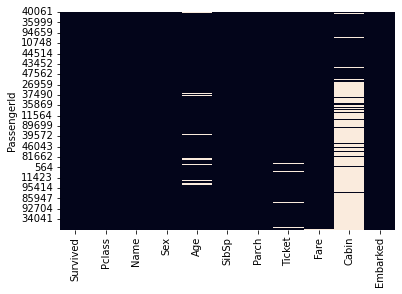

In [22]:
data.sort_values(by=['Pclass', 'Fare'], ascending=[True, False], inplace=True)

# Тепловая карта пропусков
sns.heatmap(data.isnull(), cbar = False)

In [23]:
# Заполним пропущенные значения в столбце Cabin
data['Cabin'].fillna('NA', inplace=True)

# Первая буква номера каюты может быть обозначением палубы
# Заменим номера кают их первой буквой
data['Cabin'] = data.Cabin.str.replace(r'(([a-zA-Z])([0-9]+))', lambda x: x.group(2), regex=True)

# Переименуем столбец
data.columns = data.columns.str.replace('Cabin', 'Deck')
data['Deck'].value_counts()

NA    67866
C     11825
B      7439
A      6307
D      3637
E      1749
F       663
G       482
T        32
Name: Deck, dtype: int64

In [24]:
# Сохраним информацию о пропущенных билетах
data.Ticket = data.Ticket.isna().astype(int)

# Остальные пропуски можно отбросить
data = data.dropna()

<AxesSubplot:xlabel='Parch'>

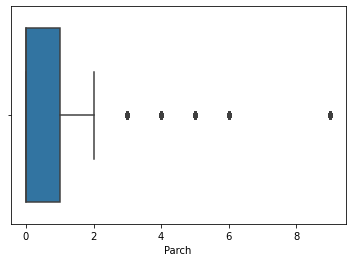

In [25]:
sns.boxplot(x=data['Parch'])

<AxesSubplot:xlabel='SibSp'>

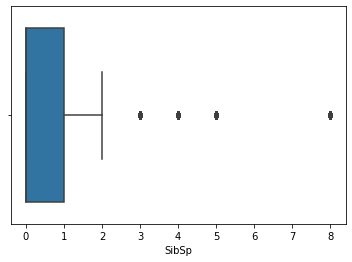

In [26]:
sns.boxplot(x=data['SibSp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Age'>

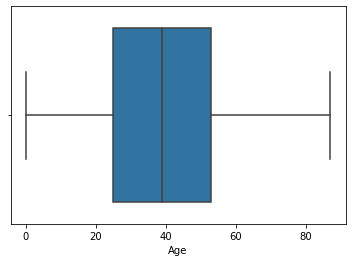

In [27]:
# Конвертируем возраст в целочисленный тип

data['Age'] = data['Age'].apply(int)

sns.boxplot(x=data['Age'])

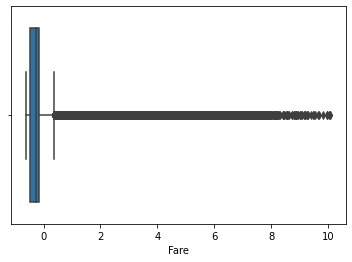

In [28]:
z_Fare = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
sns.boxplot(x=z_Fare)
del z_Fare

<mark>Распределение стоимости скошенное с большим количеством выбросов</mark>

In [29]:
data['Fare'].agg({'max', 'median', 'mean'})

mean       43.923143
max       744.660000
median     24.480000
Name: Fare, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='n_Fare'>

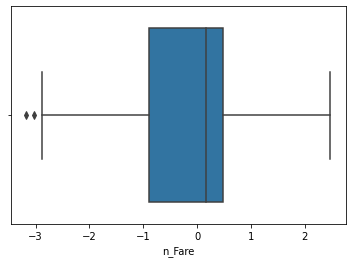

In [30]:
# Преобразуем данные

data['n_Fare'] = 1 / np.log(7 + data['Fare'])

data['n_Fare'] = (data['n_Fare'].mean() - data['n_Fare']) / data['n_Fare'].std()

sns.boxplot(data=data, x='n_Fare')

<AxesSubplot:xlabel='Pclass', ylabel='n_Fare'>

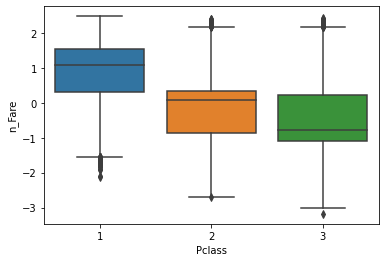

In [31]:
sns.boxplot(x=data.Pclass, y=data.n_Fare)

# Data exploration

<AxesSubplot:xlabel='Pclass', ylabel='count'>

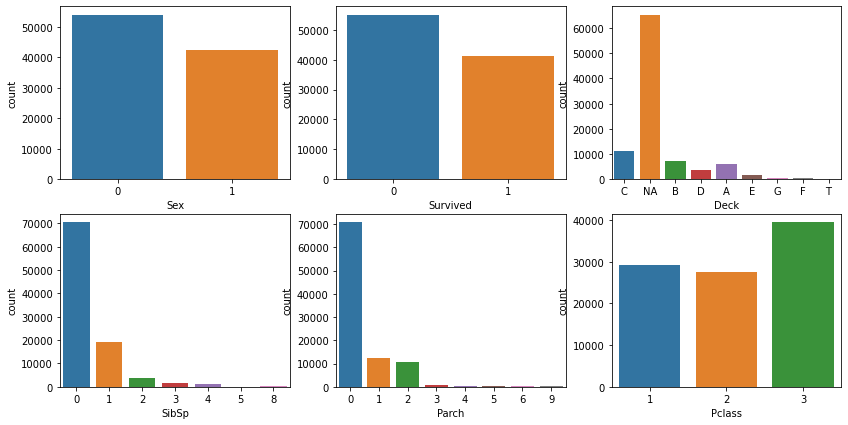

In [32]:
# Посмотрим на категириальные данные

fig, ax = plt.subplots(2, 3, figsize=(14,7))

sns.countplot(ax=ax[0,0], x=data["Sex"])
sns.countplot(ax=ax[0,1], x=data["Survived"])
sns.countplot(ax=ax[0,2], x=data["Deck"])
sns.countplot(ax=ax[1,0], x=data["SibSp"])
sns.countplot(ax=ax[1,1], x=data["Parch"])
sns.countplot(ax=ax[1,2], x=data["Pclass"])

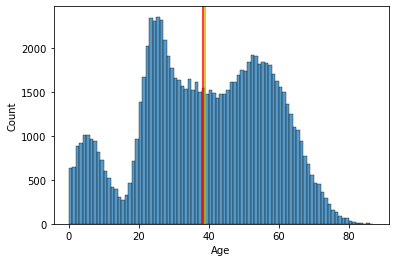

In [33]:
# Распределение возраста

sns.histplot(x=data.Age.apply(int), kde=False, bins = data.Age.max())

plt.axvline(x=data.Age.mean(), color='r')
plt.axvline(x=data.Age.median(), color='y')

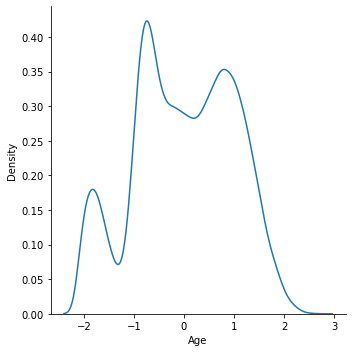

In [34]:
# Распределение возраста по z-score

z_Age = (data['Age'] - data['Age'].mean()) / data['Age'].std()
sns.displot(x=z_Age, kind='kde')
del z_Age

<AxesSubplot:xlabel='Fare', ylabel='Count'>

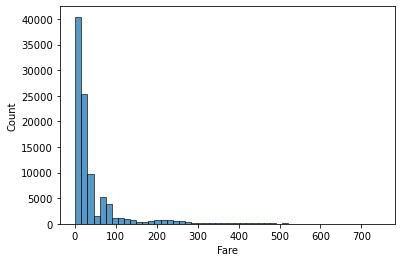

In [35]:
# Распределение стоимости

sns.histplot(x=data.Fare, kde=False, bins = 50)

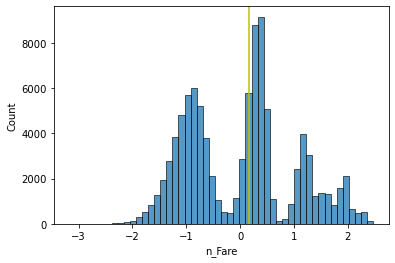

In [36]:
# Преобразованная стоимость

sns.histplot(x=data.n_Fare, kde=False, bins = 50)
plt.axvline(x=data.n_Fare.median(), color='y')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

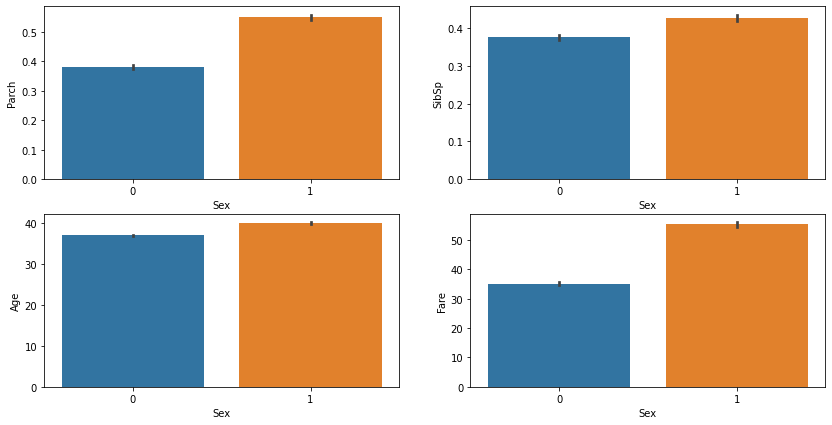

In [37]:
# Средние значения Parch, SibSp, Age, Fare в зависимости от пола

fig, ax = plt.subplots(2, 2, figsize=(14,7))

sns.barplot(ax=ax[0,0], x="Sex", y='Parch', data=data)
sns.barplot(ax=ax[0,1], x="Sex", y='SibSp', data=data)
sns.barplot(ax=ax[1,0], x="Sex", y='Age', data=data)
sns.barplot(ax=ax[1,1], x="Sex", y='Fare', data=data)

Text(0.5, 1.0, 'Количество билетов каждого класса в зависимости от пола')

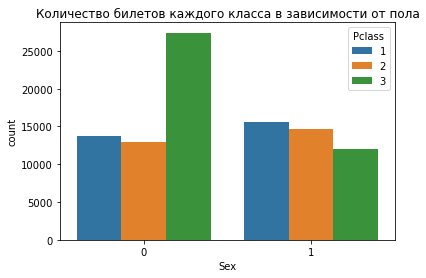

In [38]:
sns.countplot(x=data.Sex, hue=data.Pclass)
plt.title('Количество билетов каждого класса в зависимости от пола')

Text(0.5, 1.0, 'Процент выживших в зависимости от пола')

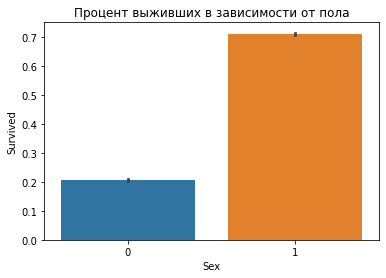

In [39]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Процент выживших в зависимости от пола')

In [40]:
data.groupby('Sex')['Survived'].mean()

Sex
0    0.205902
1    0.711717
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Количество выживших в зависимости от порта посадки')

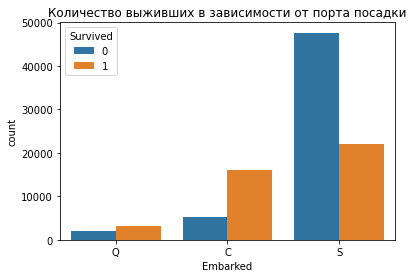

In [41]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Количество выживших в зависимости от порта посадки')

Text(0.5, 1.0, 'Количество выживших в зависимости от пола')

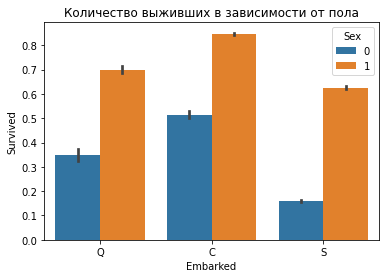

In [42]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data)
plt.title('Количество выживших в зависимости от пола')

Text(0.5, 1.0, 'Сравнение портов по классу')

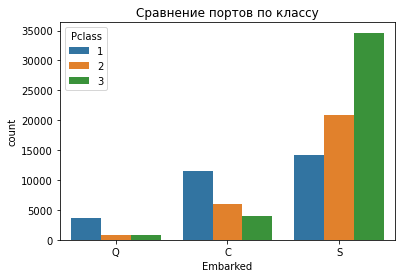

In [43]:
sns.countplot(x='Embarked', hue='Pclass', data=data)
plt.title('Сравнение портов по классу')

Text(0.5, 1.0, 'Сравнение портов по возрасту')

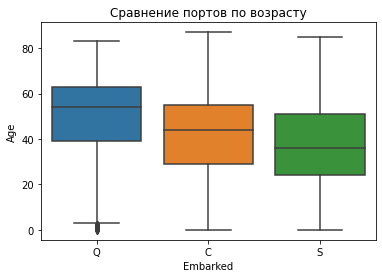

In [44]:
sns.boxplot(x=data.Embarked, y=data.Age)
plt.title('Сравнение портов по возрасту') 

<AxesSubplot:>

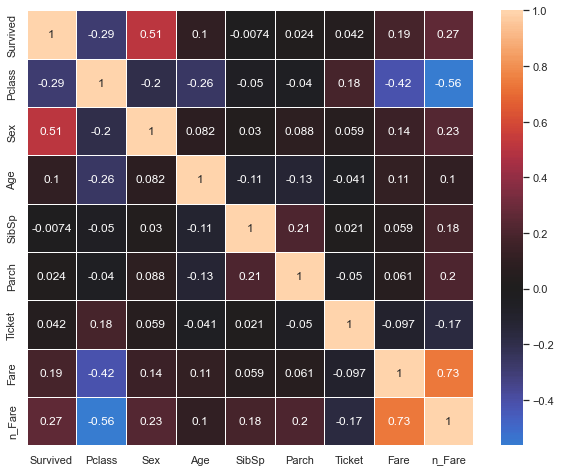

In [45]:
# Тепловая карта корреляции

sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data.corr(), center=0, linewidths=.5, annot=True)

Text(0.5, 1.0, 'Стоимость билета по возрастам')

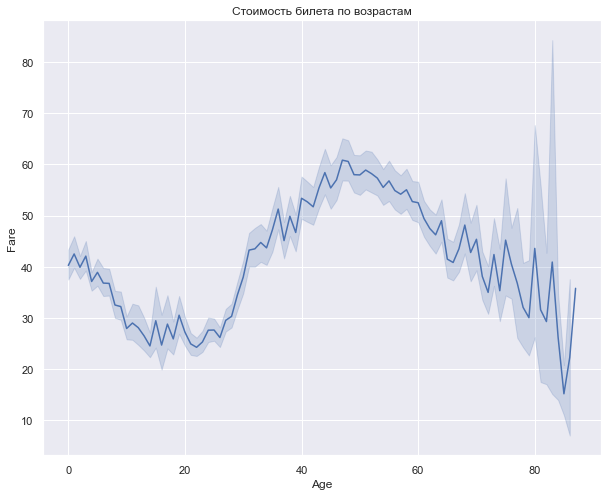

In [46]:
sns.set(rc={'figure.figsize':(10, 8)})

sns.lineplot(data=data, x='Age', y='Fare')
plt.title('Стоимость билета по возрастам') 

Text(0.5, 1.0, 'Выживаемость по возрастам')

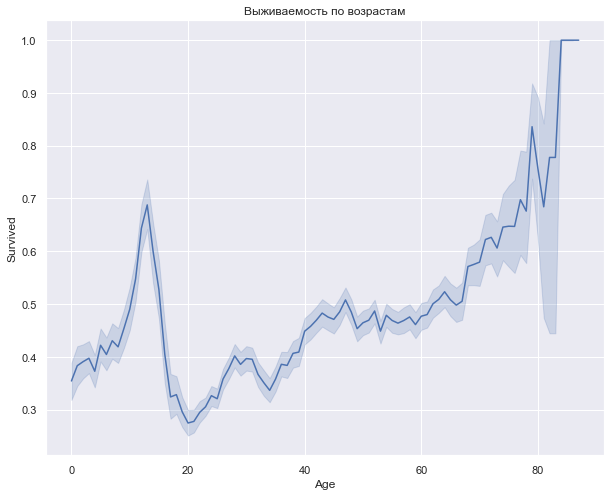

In [47]:
sns.lineplot(data=data, x='Age', y='Survived')
plt.title('Выживаемость по возрастам') 

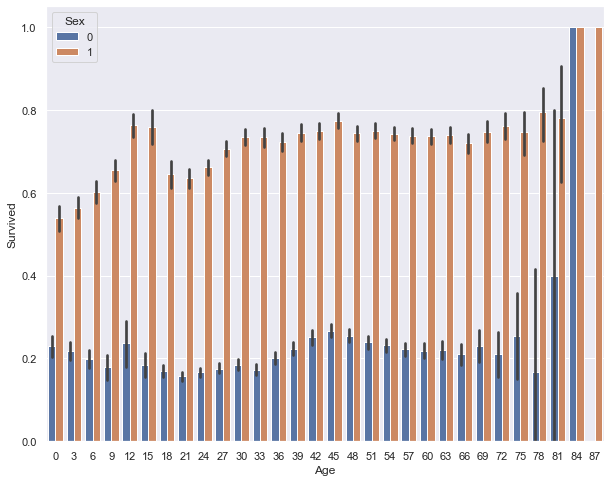

In [48]:
age_binned = data.Age.apply(lambda x: x // 3)
age_binned = age_binned * 3

sns.barplot(data=data, x=age_binned, y='Survived', hue='Sex')
del age_binned

Text(0, 0.5, 'Relatives')

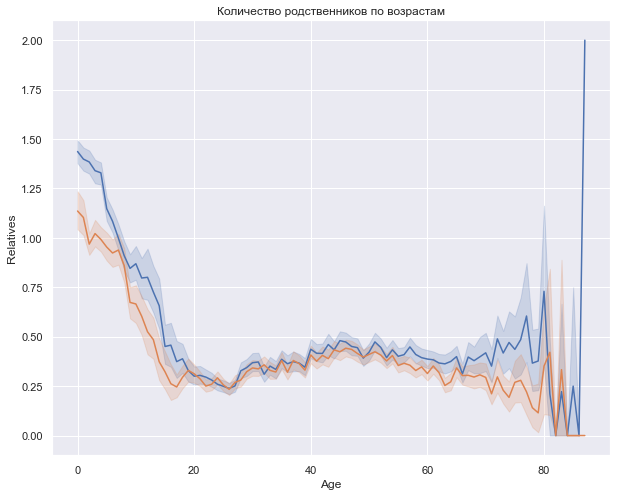

In [49]:
sns.lineplot(data=data, x='Age', y='Parch')
sns.lineplot(data=data, x='Age', y='SibSp')
plt.title('Количество родственников по возрастам') 
plt.ylabel('Relatives')

<AxesSubplot:xlabel='Parch', ylabel='n_Fare'>

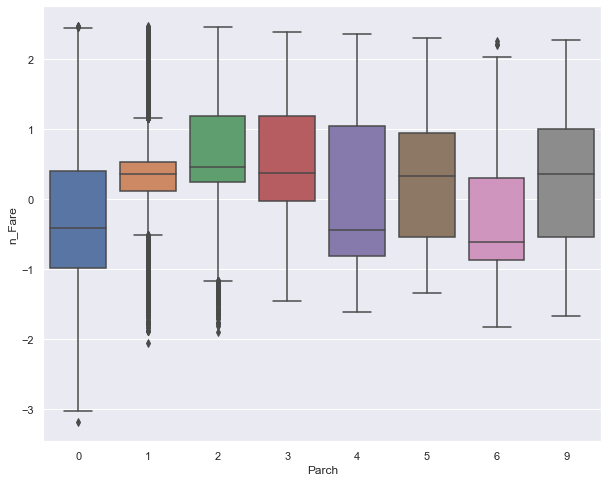

In [50]:
# Стоимость билетов в зависимости от parents | children

sns.boxplot(data=data, x='Parch', y='n_Fare')

In [51]:
data[data.Parch == 6].shape[0]

198

<AxesSubplot:xlabel='SibSp', ylabel='n_Fare'>

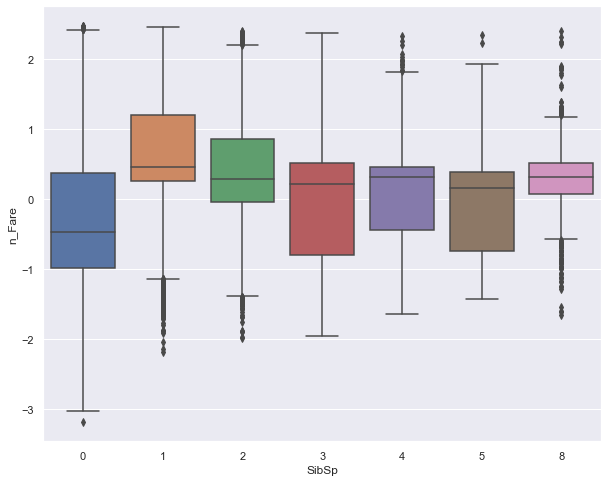

In [52]:
# Стоимость билетов в зависимости от siblings / spouses

sns.boxplot(data=data, x='SibSp', y='n_Fare')

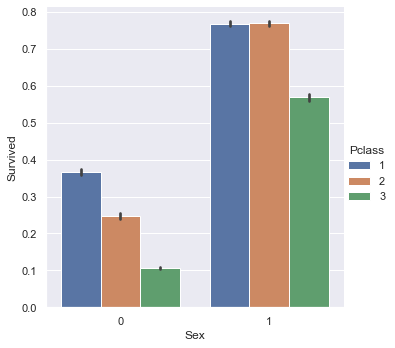

In [53]:
# Доля выживших c разными класами билетов

sns.catplot(x="Sex", y="Survived", hue='Pclass', kind="bar", data=data)

<mark>Для пассажиров женского пола класс билета менее важен</mark>

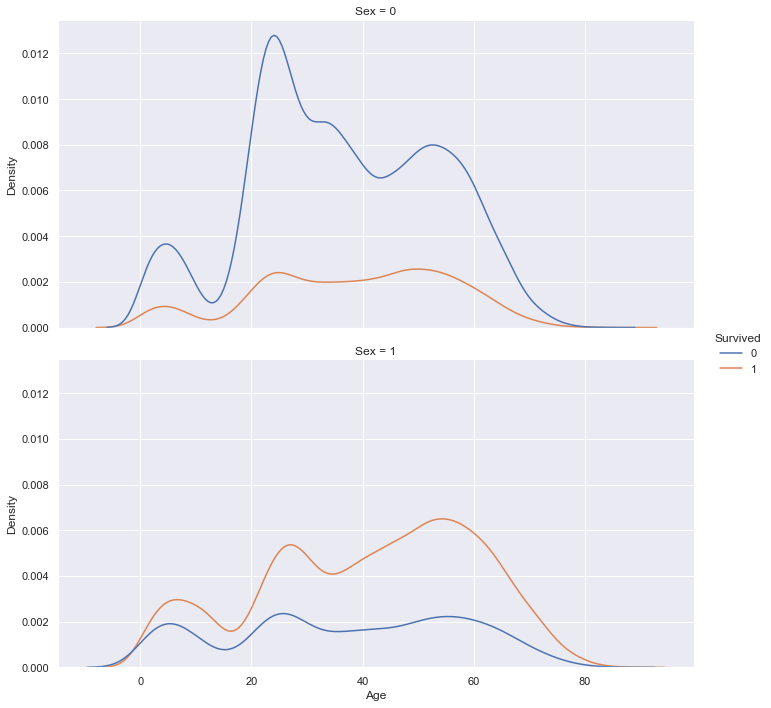

In [54]:
# Распределение возраста по переменным Sex и Survived

sns.displot(data, x='Age', hue='Survived', row='Sex', height=5, aspect=2, kind="kde")

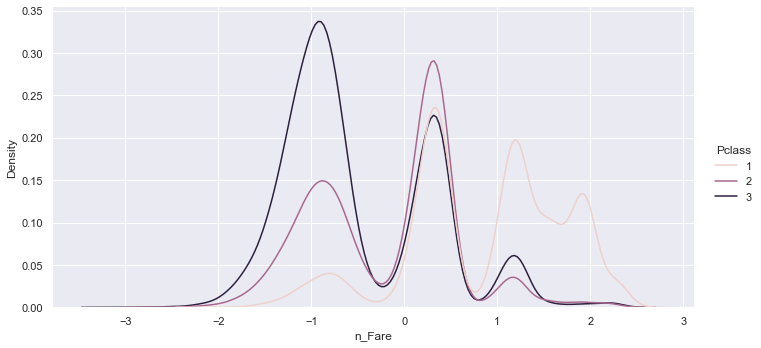

In [55]:
# Распределение преобразованной стоимости по классу билетов

sns.displot(data, x='n_Fare', hue='Pclass', height=5, aspect=2, kind="kde")

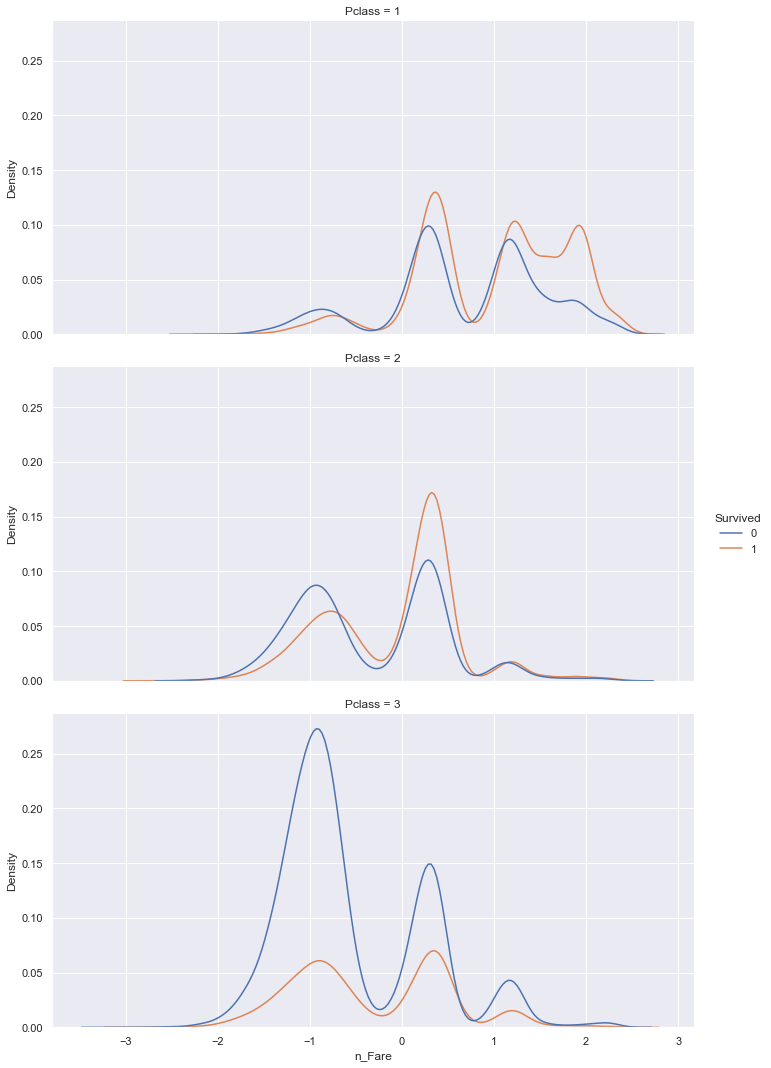

In [56]:
# Распределение преобразованной стоимости по классу билетов и количеству выживших

sns.displot(data=data, x='n_Fare', hue='Survived', row='Pclass', height=5, aspect=2, kind="kde")

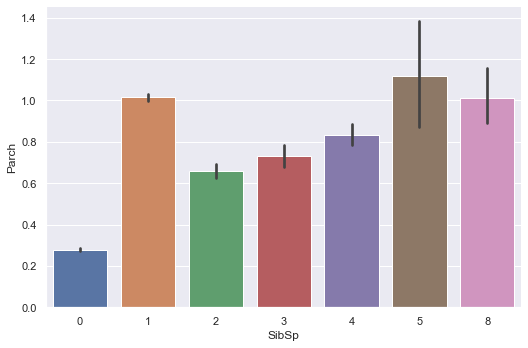

In [57]:
# Связь siblings / spouses и parents / children

sns.catplot(x="SibSp", y='Parch', kind="bar", aspect=1.5, data=data)

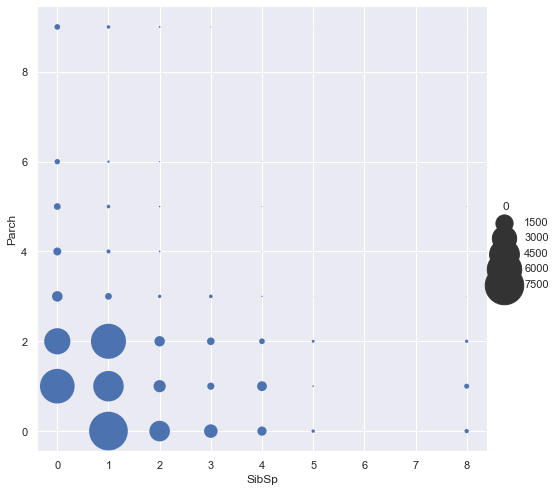

In [58]:
rl_groups = data[(data.Parch > 0) | (data.SibSp > 0)].groupby(['SibSp', 'Parch']).size().reset_index()
sns.relplot(x="SibSp", y="Parch", size=0, sizes=(0, 1500), data=rl_groups, height=7, palette=0);

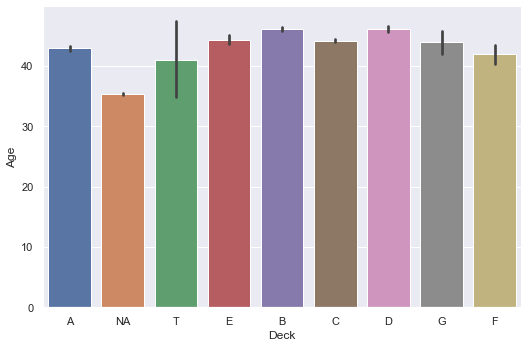

In [59]:
# Распределение возраста пассажиров в зависимости от палубы

order = data.groupby('Deck')['Survived'].mean().sort_values().index

sns.catplot(x="Deck", y="Age", kind="bar", aspect=1.5, data=data, order=order)

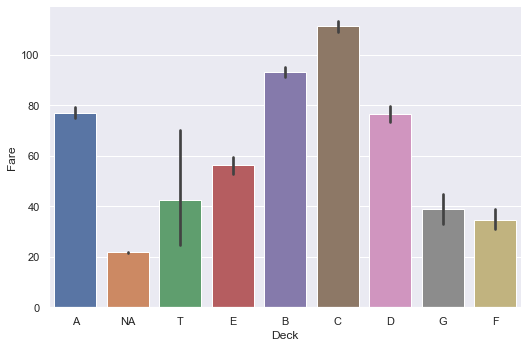

In [60]:
# Стоимость билета по палубам

sns.catplot(x="Deck", y="Fare", kind="bar", aspect=1.5, data=data, order=order)

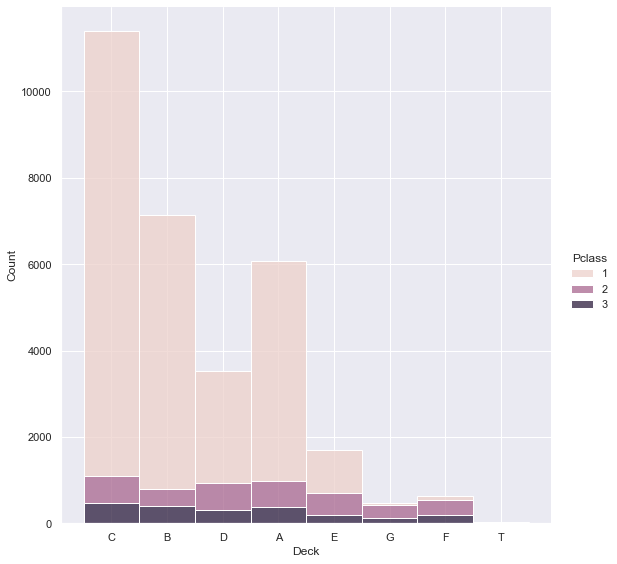

In [61]:
# Распределение классов билетов по палубам

sns.displot(x="Deck", hue="Pclass", multiple="stack", height=8, data=data[data['Deck'] != 'NA'])

<AxesSubplot:xlabel='Survived', ylabel='Deck'>

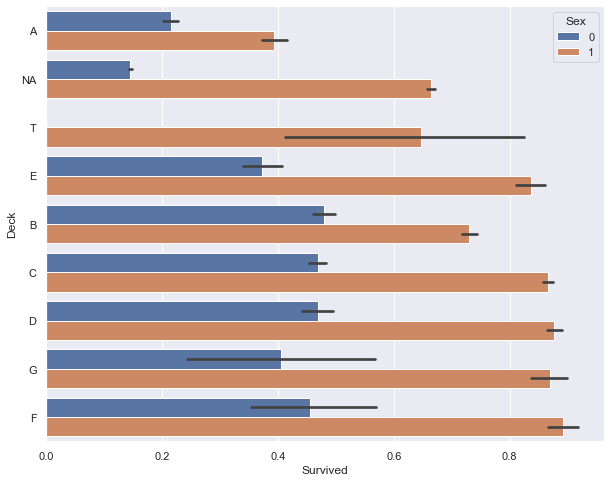

In [62]:
# Выживаемость пассажиров из разных палуб

sns.barplot(y="Deck", x="Survived", data=data, order=order, hue='Sex')

In [63]:
data[data.Deck == 'NA'].groupby(['Survived']).size()

Survived
0    42987
1    22384
dtype: int64

In [64]:
data.groupby(['Ticket'])['Survived'].mean()

Ticket
0    0.423520
1    0.522462
Name: Survived, dtype: float64

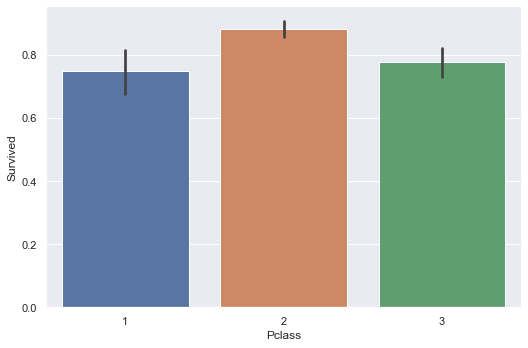

In [65]:
# Выживаемость пассажиров из палуб F и G по классам

sns.catplot(x="Pclass", y="Survived", kind="bar", aspect=1.5, data=data[data['Deck'].isin(['F', 'G'])])

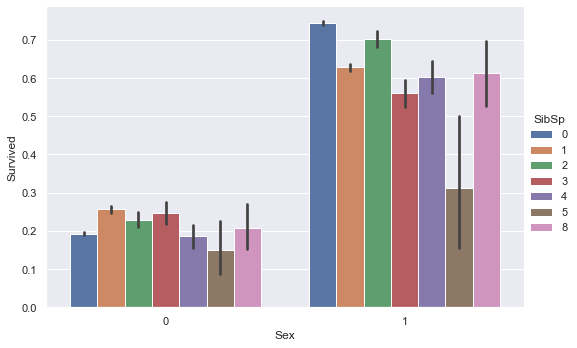

In [66]:
# Выживаемость в зависимости от siblings / spouses

sns.catplot(x="Sex", y="Survived", hue='SibSp', kind="bar", aspect=1.5, data=data)

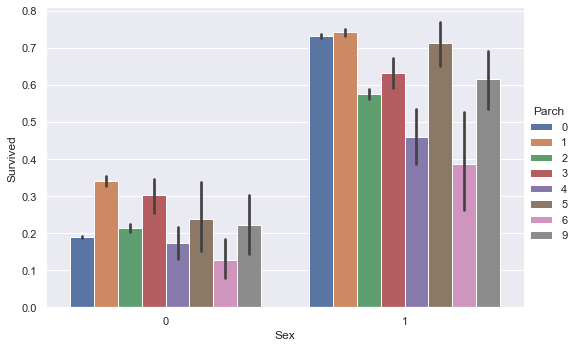

In [67]:
# Выживаемость в зависимости от parents / children

sns.catplot(x="Sex", y="Survived" ,hue='Parch', kind="bar", aspect=1.5, data=data)

<AxesSubplot:xlabel='Deck', ylabel='count'>

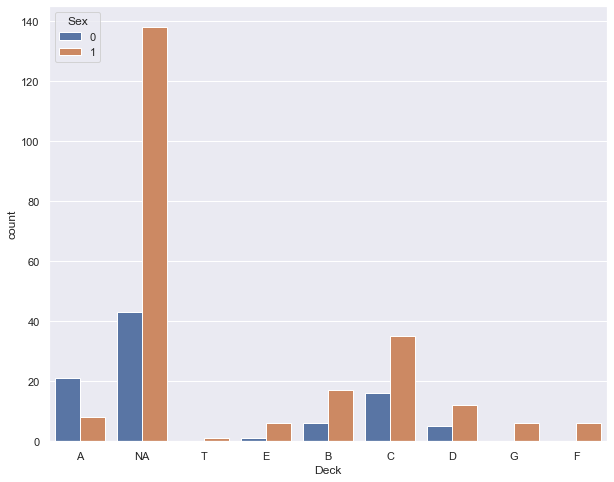

In [68]:
# Как распределены пассажиры с пятью parents/children по палубам

sns.countplot(x="Deck", data=data[data.Parch == 5], order=order, hue='Sex')

<AxesSubplot:xlabel='Deck', ylabel='count'>

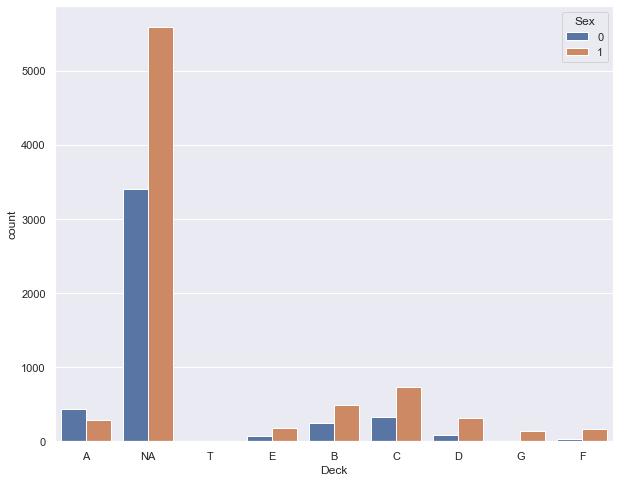

In [69]:
# Как распределены пассажиры с одним parents/children по палубам

sns.countplot(x="Deck", data=data[data.Parch == 1], order=order, hue='Sex')

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

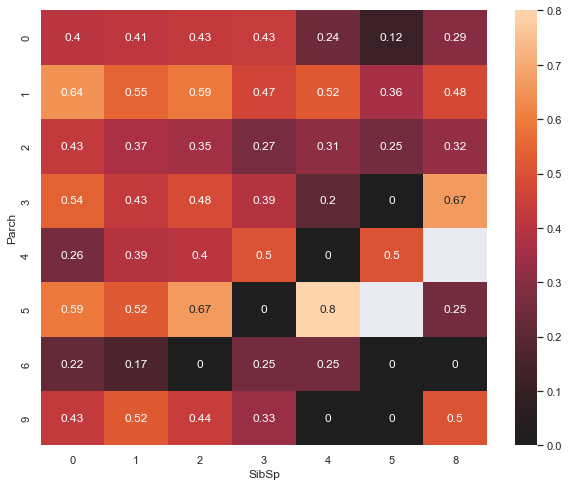

In [70]:
# Тепловая карта доли выживших в зависимости от SibSp / Parch

data_h = data.groupby(['Parch', 'SibSp']).agg(Survived=('Survived', 'mean')).reset_index()
data_h = data_h.pivot('Parch', 'SibSp', 'Survived')

sns.heatmap(data_h, center=0, annot=True)

# Summary

***

### Качество данных  
<br>
Всего данные содержат 100000 записей о пассажирах по 11 переменным:  

Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

Среди них 54016 мужcкого и 42316 женского пола.

Пропущенные значения:  
Cabin       67866  
Ticket       4623  
Age          3292  
Embarked      250  
Fare          134  

Явные дубликаты отсутствуют.  

Возраст пассажиров: 0.08 - 87 лет. Без аутлаеров. Среднее: 38 лет.

Выжило 42.8% пассажиров.  

Стоимость билетов сильно скошена вправо. Разброс стоимости: 0.68$ - 744$. Медиана: 24.48$.  

Более 2/3 номеров кают отсутствует. Большинство пропусков связано с классом билета 2 и 3.  

У пассажиров с отсутствующими номерами билетов выживаемость на 10% ниже.

Отсутствующие номера кают встречаются у погибших в 2 раза чаще, чем у выживших.

В номерах кают содержатся названия палуб.  

Переменные Parch, SibSp представляют собой сумму двух характеристик, что снижает возможности для анализа. Также в них присутствуют аутлаеры.

Количество родственников распределено неравномерно. Большинство пассажиров путешествовало в одиночку.

Билеты делятся на 3 класса: 1 класс: 30%, 2 класс: 29%, 3 класс: 41%.

Номера билетов представлены в различном формате. Большинство состоит из числовых значений. Некоторые номера представляет собой категории.
<br>
<br>

### Закономерности в данных
<br>
Билетов класса 3 у мужчин вдвое больше, чем класса 1 или 2. У женщин распределение билетов по классам близкое к равномерному.

Порты посадки различаются по количеству пассажиров, а также по соотношению классов билетов и других характеристик.  

Стоимость билета и количество родственников у женщин в среднем выше.

В среднем, наиболее дешевые билеты у пассажиров, путешествовавших в одиночку или с 6 детьми.

В среднем, наиболее дорогие билеты у пассажиров с одним супругом/сиблингом или с двумя детьми/родителями.

В среднем, наиболее дорогие билеты у пассажиров 40-60 лет.

Выживаемость зависит от пола пассажира, класса билета, стоимости билета, возраста, расположения каюты.

Наиболее сильная корреляция выживаемости составляет 0.51 (пол пассажира). Далее: -0.29 (класс билета), 0.19 (стоимость билета).

Корреляция класса билета составляет -0.42 со стоимостью, -0.26 с возрастом, -0.2 с полом.

Корреляция количества детей/родителей и супругов/сиблингов составляет 0.21.

Для женского и мужского пола процент выживаемости составляет 71% и 20% соответственно. Это связано с организацией эвакуации, и с тем, что изначально мужчин было больше.

Выживаемость в зависимости от класса билета сильнее выражена у мужчин. 

Пассажиры 18-24 лет погибали чаще других.

Пассажиры старше 80 лет выживали чаще других.

A - палуба с наименьшим процентом выживаемости.

Женщины без супругов/сиблингов выживали чаще других.

Мужчины с 1-3 супругами/сиблингами или с 1,3 родителями/детьми выживали чаще других.

Пассажиры с 5 супругами/сиблингами или с 6 родителями/детьми погибали чаще других.
***